In [84]:
!pip install cvxpy

     |████████████████████████████████| 686kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 163kB 15.6MB/s eta 0:00:01
     |████████████████████████████████| 133kB 15.1MB/s eta 0:00:01
     |████████████████████████████████| 163kB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 153kB 10.0MB/s eta 0:00:01
     |████████████████████████████████| 829kB 9.6MB/s eta 0:00:01
  Created wheel for multiprocess: filename=multiprocess-0.70.9-cp37-none-any.whl size=108029 sha256=285bf70c0f75339e97be2c1c83117b41f2d5d4db500c325c288f802f3b9f011c
  Stored in directory: /Users/mukesh/Library/Caches/pip/wheels/96/20/ac/9f1d164f7d81787cd6f4401b1d05212807d021fbbbcc301b82
  Created wheel for scs: filename=scs-2.1.1.post2-cp37-cp37m-macosx_10_7_x86_64.whl size=117256 sha256=f2b187d4b6502b9743c186d947d916a3f837117632a5c96d2f26449a08d4b1aa
  Stored in directory: /Users/mukesh/Library/Caches/pip/wheels/68/3f/24/e9c75d4

In [71]:
import numpy as np
import pandas as pd
import collections
from collections import OrderedDict
import copy
import pandas as pd
import numpy as np
from datetime import date, timedelta
import seaborn as sns
from datetime import datetime

In [23]:
pd.options.display.float_format = '{:.8f}'.format

def generate_random_tickers(n_tickers=None):
    min_ticker_len = 3
    max_ticker_len = 5
    tickers = []

    if not n_tickers:
        n_tickers = np.random.randint(8, 14)

    ticker_symbol_random = np.random.randint(ord('A'), ord('Z')+1, (n_tickers, max_ticker_len))
    ticker_symbol_lengths = np.random.randint(min_ticker_len, max_ticker_len, n_tickers)
    for ticker_symbol_rand, ticker_symbol_length in zip(ticker_symbol_random, ticker_symbol_lengths):
        ticker_symbol = ''.join([chr(c_id) for c_id in ticker_symbol_rand[:ticker_symbol_length]])
        tickers.append(ticker_symbol)

    return tickers


def generate_random_dates(n_days=None):
    if not n_days:
        n_days = np.random.randint(14, 20)

    start_year = np.random.randint(1999, 2017)
    start_month = np.random.randint(1, 12)
    start_day = np.random.randint(1, 29)
    start_date = date(start_year, start_month, start_day)

    dates = []
    for i in range(n_days):
        dates.append(start_date + timedelta(days=i))

    return dates

## Resampling data

In [9]:
dates = pd.date_range('10/10/2018', periods=11, freq='D')
price = np.arange(len(dates))
close_prices =  pd.Series(price, dates)
high_prices =  pd.Series(price, dates)
low_prices =  pd.Series(price, dates)
open_prices = pd.Series(price, dates)


def days_to_weeks(open_prices, high_prices, low_prices, close_prices):
    return open_prices.resample('W').first(), high_prices.resample('W').max(), low_prices.resample('W').min(), close_prices.resample('W').last()

days_to_weeks(open_prices, high_prices, low_prices, close_prices)

(2018-10-14    0
 2018-10-21    5
 Freq: W-SUN, dtype: int64, 2018-10-14     4
 2018-10-21    10
 Freq: W-SUN, dtype: int64, 2018-10-14    0
 2018-10-21    5
 Freq: W-SUN, dtype: int64, 2018-10-14     4
 2018-10-21    10
 Freq: W-SUN, dtype: int64)

## Calculate return

In [10]:
import pandas as pd

close = pd.DataFrame(
    {
        'ABC': [1, 5, 3, 6, 2],
        'EFG': [12, 51, 43, 56, 22],
        'XYZ': [35, 36, 36, 36, 37],},
    pd.date_range('10/01/2018', periods=5, freq='D'))

def calculate_returns(close):
    return (close - close.shift(1))/close.shift(1)

calculate_returns(close)

,ABC,EFG,XYZ
2018-10-01,NaN,NaN,NaN
2018-10-02,4.000000,3.250000,0.028571
2018-10-03,-0.400000,-0.156863,0.000000
2018-10-04,1.000000,0.302326,0.000000
2018-10-05,-0.666667,-0.607143,0.027778


## Calculate position

In [12]:
prices = np.array([1, 3, -2, 9, 5, 7, 2])
def generate_positions(prices):
    # TODO: Implement Function
    signal_1 = prices > 50
    signal_2 = prices < 20
    long_position =  30* signal_1.astype(np.int)
    short_position =  -10* signal_2.astype(np.int)
    final_position = long_position + short_position
    return final_position
generate_positions(prices)

array([-10, -10, -10, -10, -10, -10, -10])

## Top and Bottom Performing

In [24]:
import pandas as pd

tickers = generate_random_tickers(10)
dates = generate_random_dates(2)


prices = pd.DataFrame(
        [
            [21.050810483942833, 17.013843810658827, 10.984503755486879, 11.248093428369392, 12.961712733997235,
             482.34539247360806, 35.202580592515041, 3516.5416782257166, 66.405314327318209, 13.503960481087077],
            [15.63570258751384, 14.69054309070934, 11.353027688995159, 475.74195118202061, 11.959640427803022,
             10.918933017418304, 17.9086438675435, 24.801265417692324, 12.488954191854916, 15.63570258751384]],
dates, tickers)
sector =  pd.Series(
        ['ENERGY', 'MATERIALS', 'ENERGY', 'ENERGY', 'TELECOM', 'FINANCIALS',
         'TECHNOLOGY', 'HEALTH', 'MATERIALS', 'REAL ESTATE'],
        tickers)
date =  dates[-1]
top_n =  4


def date_top_industries(prices, sector, date, top_n):
    return set(sector.loc[prices.loc[date].nlargest(top_n).index])

date_top_industries(prices, sector, date, top_n)

{'ENERGY', 'HEALTH', 'TECHNOLOGY'}

## Analysing return t-test

In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def analyze_returns(net_returns):
    null_hypothesis = 0.0
    t_value, p_value = stats.ttest_1samp(net_returns,null_hypothesis)
    return t_value, p_value/2
# net_returns = pd.read_csv()
net_returns = pd.read_csv('Quizes/net_return.csv', header=0, dtype={'return':'float64'})
analyze_returns(net_returns)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Testing if a Distribution is Normal

In [41]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))

# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))

def is_normal(sample, test=stats.shapiro, p_level=0.05, **kwargs):
    """Apply a normality test to check if sample is normally distributed."""
    t_stat, p_value = test(sample, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

# Using Shapiro-Wilk test (default)
print("Sample A:-"); is_normal(sample_a);
print("Sample B:-"); is_normal(sample_b);

def is_normal_ks(sample, test=stats.kstest, p_level=0.05, **kwargs):
    """
    sample: a sample distribution
    test: a function that tests for normality
    p_level: if the test returns a p-value > than p_level, assume normality
    
    return: True if distribution is normal, False otherwise
    """
    normal_args = (sample.mean(), sample.std())
    
    t_stat, p_value = test(sample, 'norm', normal_args, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level


# Using Kolmogorov-Smirnov test
print("Sample A:-"); is_normal_ks(sample_a);
print("Sample B:-"); is_normal_ks(sample_b);

Sample A:-
Test statistic: 0.9988639950752258, p-value: 0.7954987287521362
Is the distribution Likely Normal? True
Sample B:-
Test statistic: 0.8944714665412903, p-value: 1.2914069635633533e-25
Is the distribution Likely Normal? False
Sample A:-
Test statistic: 0.012509908871963127, p-value: 0.9976110116482639
Is the distribution Likely Normal? True
Sample B:-
Test statistic: 0.09927924988330633, p-value: 4.944560314905113e-09
Is the distribution Likely Normal? False



## Regression

slope 0.74 and intercept 30.62


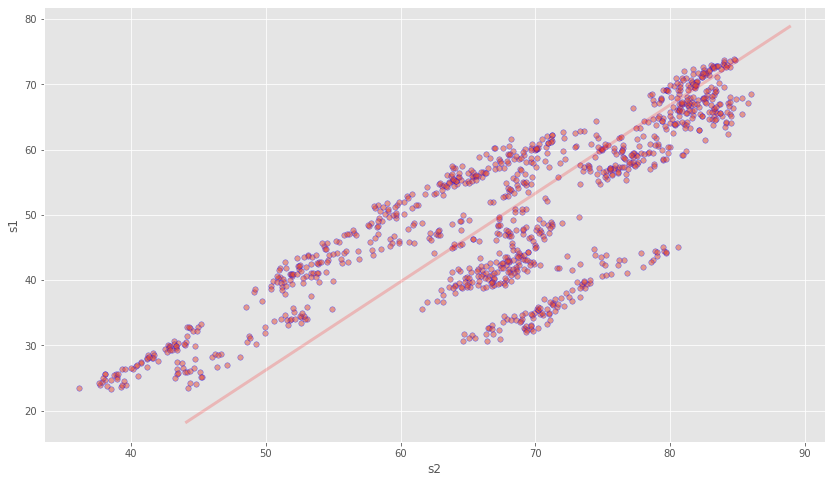

In [53]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.values.reshape(-1,1)
    yVar = ySeries.values.reshape(-1,1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    lr.fit(X=xVar, y=yVar)
    #TODO: obtain the slope and intercept
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    
    return (slope, intercept)

slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');

/Users/mukesh/Projects/learning/udacity/aitnd/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fitted AR parameter 0.21, MA parameter -0.98


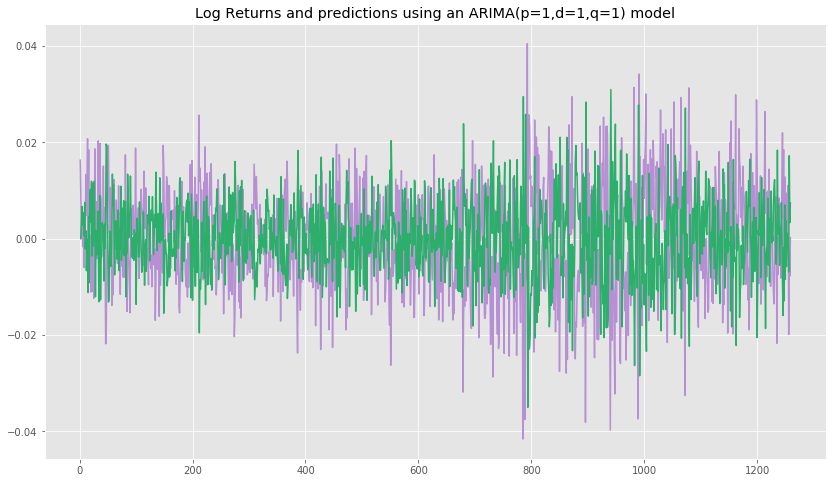

In [65]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(200)

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.3])
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret)) + drift



lret = np.log(price) - np.log(price.shift(1))
lret = lret[1:]


lb_test_stat, lb_p_value = acorr_ljungbox(lret,lags=20)
lb_p_value

AR_lag_p = 1
MA_lag_q = 1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)


def fit_arima(lret):
    
    #TODO: choose autoregression lag of 1
    AR_lag_p = 1
    
    #TODO: choose moving average lag of 1
    MA_lag_q = 1
    
    #TODO: choose order of integration 1
    order_of_integration_d = 1
    
    #TODO: Create a tuple of p,d,q
    order = (AR_lag_p, MA_lag_q, order_of_integration_d)
    
    #TODO: create an ARIMA model object, passing in the values of the lret pandas series,
    # and the tuple containing the (p,d,q) order arguments
    arima_model = ARIMA(lret, order=order)
    
    arima_result = arima_model.fit()
    
    #TODO: from the result of calling ARIMA.fit(),
    # save and return the fitted values, autoregression parameters, and moving average parameters
    fittedvalues = arima_result.fittedvalues
    arparams = arima_result.arparams
    maparams = arima_result.maparams
   
    return fittedvalues,arparams,maparams

fittedvalues,arparams,maparams = fit_arima(lret)
arima_pred = pd.Series(fittedvalues)
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")

## Volatility

In [69]:
def get_most_volatile(prices):
    """Return the ticker symbol for the most volatile stock.
    
    Parameters
    ----------
    prices : pandas.DataFrame
        a pandas.DataFrame object with columns: ['ticker', 'date', 'price']
    
    Returns
    -------
    ticker : string
        ticker symbol for the most volatile stock
    """
    # TODO: Fill in this function.
    ticker = prices['ticker'].unique()
    ret = {}
    for t in ticker:
        price = prices.loc[prices['ticker'] == t]['price']
        log_ret = np.log(price)-np.log(price.shift(1))
        ret[t] = log_ret.std()
    print(ret)
    return max(ret, key=ret.get)

prices = pd.read_csv('Quizes/price.csv', parse_dates=['date'])
get_most_volatile(prices)

{'A': 0.006443583770338254, 'B': 0.011311826547439325}


'B'

## Moving Average 

In [74]:
dates = pd.date_range(datetime.strptime('10/10/2018', '%m/%d/%Y'), periods=11, freq='D')
close_prices = np.arange(len(dates))

close = pd.Series(close_prices, dates)

def calculate_simple_moving_average(rolling_window, close):
    return close.rolling(rolling_window).mean()

calculate_simple_moving_average(3, close)

2018-10-10          nan
2018-10-11          nan
2018-10-12   1.00000000
2018-10-13   2.00000000
2018-10-14   3.00000000
2018-10-15   4.00000000
2018-10-16   5.00000000
2018-10-17   6.00000000
2018-10-18   7.00000000
2018-10-19   8.00000000
2018-10-20   9.00000000
Freq: D, dtype: float64

## Estimate Volatility

In [76]:

def estimate_volatility(prices, l):
    # TODO: Implement the exponential moving average volatility model and return the last value.
    log_return = np.log(prices)-np.log(prices.shift(1))
    alpha = 1-l
    
    return np.sqrt((log_return**2).ewm(alpha=alpha, adjust=True).mean())[-1]

prices = pd.read_csv('Quizes/data.csv', parse_dates=['date'], index_col='date', squeeze=True)
print("Most recent volatility estimate: {:.6f}".format(estimate_volatility(prices, 0.7)))

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method

(-30.16106943156166, 0.0, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2770.840780057449)
pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary
Are the two series candidates for pairs trading? True


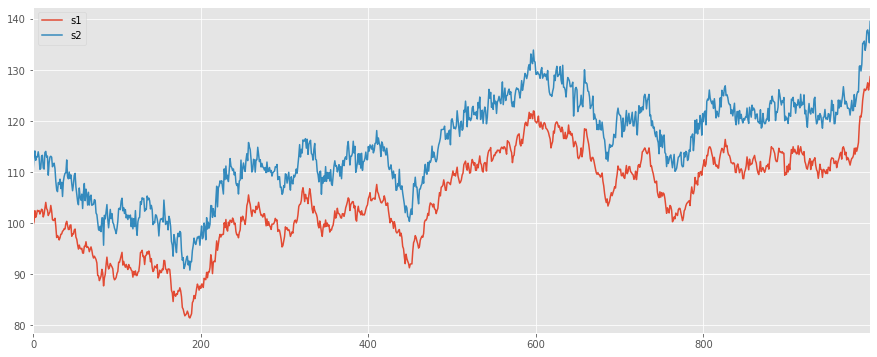

In [79]:
from statsmodels.tsa.stattools import adfuller

# just set the seed for the random number generator
np.random.seed(2018)
# use returns to create a price series
drift = 100
r1 = np.random.normal(0, 1, 1000) 
s1 = pd.Series(np.cumsum(r1), name='s1') + drift

offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 's2'
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))


lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1),s2.values.reshape(-1,1))
hedge_ratio = lr.coef_[0][0]

spread = s2 - s1 * hedge_ratio

def is_spread_stationary(spread, p_level=0.05):
    """
    spread: obtained from linear combination of two series with a hedge ratio
    
    p_level: level of significance required to reject null hypothesis of non-stationarity
    
    returns:
        True if spread can be considered stationary
        False otherwise
    """
    #TODO: use the adfuller function to check the spread
    adf_result = adfuller(spread, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    print(adf_result)
    #get the p-value
#     adf,pvalue,usedlag,nobs,critical,icbest = adf_result[1]
    pvalue = adf_result[1]
    
    print(f"pvalue {pvalue:.4f}")
    if pvalue <= p_level:
        print(f"pvalue is <= {p_level}, assume spread is stationary")
        return True
    else:
        print(f"pvalue is > {p_level}, assume spread is not stationary")
        return False
    
# Try out your function
print(f"Are the two series candidates for pairs trading? {is_spread_stationary(spread)}")

## Covariance Matrix

In [82]:

def covariance_matrix(returns):
    """
    Create a function that takes the return series of a set of stocks
    and calculates the covariance matrix.
    
    Parameters
    ----------
    returns : numpy.ndarray
        2D array containing stock return series in each row.
                
    Returns
    -------
    x : np.ndarray
        A numpy ndarray containing the covariance matrix
    """
    
    #covariance matrix of returns
        
    return np.cov(returns)

"""Test with a 3 simulated stock return series"""
days_per_year = 252
years = 3
total_days = days_per_year * years

return_market = np.random.normal(loc=0.05, scale=0.3, size=days_per_year)
return_1 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
return_2 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
return_3 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
returns = np.array([return_1, return_2, return_3])

"""try out your function"""
cov = covariance_matrix(returns)

print(f"The covariance matrix is \n{cov}")

The covariance matrix is 
[[0.08413362 0.08413363 0.08413362]
 [0.08413363 0.08413364 0.08413363]
 [0.08413362 0.08413363 0.08413362]]


## Portfolio Optimization using cvxpy

In [85]:
import cvxpy as cvx
import numpy as np


def optimize_twoasset_portfolio(varA, varB, rAB):
    """Create a function that takes in the variance of Stock A, the variance of
    Stock B, and the correlation between Stocks A and B as arguments and returns 
    the vector of optimal weights
    
    Parameters
    ----------
    varA : float
        The variance of Stock A.
        
    varB : float
        The variance of Stock B.    
        
    rAB : float
        The correlation between Stocks A and B.
        
    Returns
    -------
    x : np.ndarray
        A 2-element numpy ndarray containing the weights on Stocks A and B,
        [x_A, x_B], that minimize the portfolio variance.
    
    """
    # TODO: Use cvxpy to determine the weights on the assets in a 2-asset
    # portfolio that minimize portfolio variance.
    
    cov = np.sqrt(varA)*np.sqrt(varB)*rAB
    x = cvx.Variable(2)
    P = np.array([[varA, cov],[cov, varB]])
    objective = cvx.Minimize(cvx.quad_form(x,P))
    constraints = [sum(x)==1]
    problem = cvx.Problem(objective, constraints)
    min_value = problem.solve()
    xA,xB = x.value
    
    return xA, xB
"""Test run optimize_twoasset_portfolio()."""
xA,xB = optimize_twoasset_portfolio(0.1, 0.05, 0.25)
print("Weight on Stock A: {:.6f}".format(xA))
print("Weight on Stock B: {:.6f}".format(xB))

Weight on Stock A: 0.281935
Weight on Stock B: 0.718065


In [87]:

## Advanced Portfolio Optimization using cvxpy

In [88]:
import cvxpy as cvx
import numpy as np


def optimize_portfolio(returns, index_weights, scale=.00001):
    """
    Create a function that takes the return series of a set of stocks, the index weights,
    and scaling factor. The function will minimize a combination of the portfolio variance
    and the distance of its weights from the index weights.  
    The optimization will be constrained to be long only, and the weights should sum to one.
    
    Parameters
    ----------
    returns : numpy.ndarray
        2D array containing stock return series in each row.
        
    index_weights : numpy.ndarray
        1D numpy array containing weights of the index.
        
    scale : float
        The scaling factor applied to the distance between portfolio and index weights
        
    Returns
    -------
    x : np.ndarray
        A numpy ndarray containing the weights of the stocks in the optimized portfolio
    """
    # TODO: Use cvxpy to determine the weights on the assets
    # that minimizes the combination of portfolio variance and distance from index weights
    
    # number of stocks m is number of rows of returns, and also number of index weights
    m = returns.shape[0]
    
    #covariance matrix of returns
    cov = np.cov(returns)
    
    # x variables (to be found with optimization)
    x = cvx.Variable(m)
    
    #portfolio variance, in quadratic form
    portfolio_variance = cvx.quad_form(x, cov)
    
    # euclidean distance (L2 norm) between portfolio and index weights
    distance_to_index = cvx.norm(x - index_weights)
    
    #objective function
    objective = cvx.Minimize(portfolio_variance + scale * distance_to_index)
    
    #constraints
    constraints = [x >= 0, sum(x) == 1]

    #use cvxpy to solve the objective
    
    cvx.Problem(objective, constraints).solve()
    
    #retrieve the weights of the optimized portfolio
    x_values = x.value
    return x_values


"""Test with a 3 simulated stock return series"""
days_per_year = 252
years = 3
total_days = days_per_year * years

return_market = np.random.normal(loc=0.05, scale=0.3, size=days_per_year)
return_1 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
return_2 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
return_3 = np.random.uniform(low=-0.000001, high=.000001, size=days_per_year) + return_market
returns = np.array([return_1, return_2, return_3])

"""simulate index weights"""
index_weights = np.array([0.9,0.15,0.05])

"""try out your optimization function"""
x_values = optimize_portfolio(returns, index_weights, scale=.00001)

print(f"The optimized weights are {x_values}, which sum to {sum(x_values):.2f}")

The optimized weights are [0.86727289 0.11618322 0.01654389], which sum to 1.00
